In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
%matplotlib inline

In [2]:
circuit = QuantumCircuit(2,1)

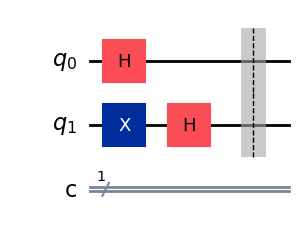

In [3]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

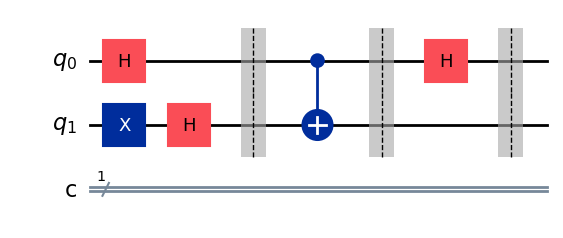

In [4]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

In [5]:
circuit.measure(0,0)

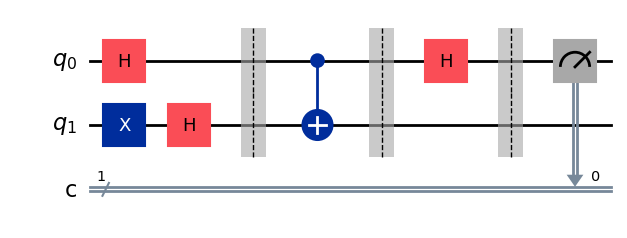

In [6]:
circuit.draw(output='mpl')

{'1': 1024}


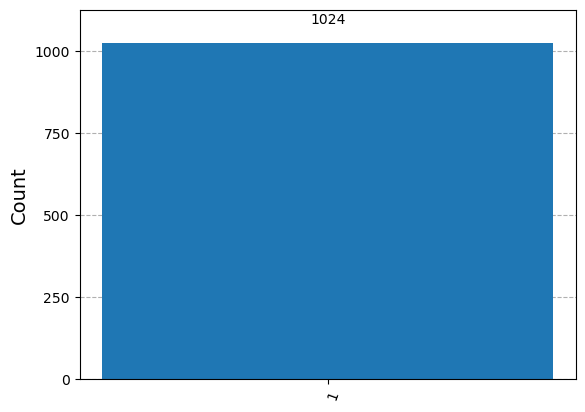

In [7]:
simulator = AerSimulator()
#How to run with a specific amount of shots (Defaults to 1024 if unspecified)
#result = simulator.run(circuit, shots=1).result()
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)
#execute(circuit, backend=simulator, shots=1024).result()
print(counts)
plot_histogram(counts)

In [8]:
#Real Quantum Computer Section 1 Account
from qiskit.providers import BackendV2
from qiskit_ibm_provider import IBMProvider

# Read the token from a text file
with open('ibmtoken.txt', 'r') as file:
    token = file.read().strip()  # Read the token and remove any extra whitespace

# Initialize the IBMProvider with the token
provider = IBMProvider(token=token)


C:\Users\solat\AppData\Local\Temp\ipykernel_3424\2950008145.py:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


In [28]:
#Real Quantum Computer Section 2 Back_end

# Get available backends
backends = provider.backends()
print("Available backends:", backends)
backend = provider.get_backend('ibm_brisbane')


Available backends: [<IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_brisbane')>]


In [30]:
#Check for backends to choose from Number of Jobs, qubits
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    
    # Check if backend.name is callable
    backend_name = backend.name() if callable(backend.name) else backend.name
    print(f"{backend_name} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibm_sherbrooke : 38 & 127 qubits
ibm_kyiv : 246 & 127 qubits
ibm_brisbane : 37 & 127 qubits


Counts: {'1': 981, '0': 43}


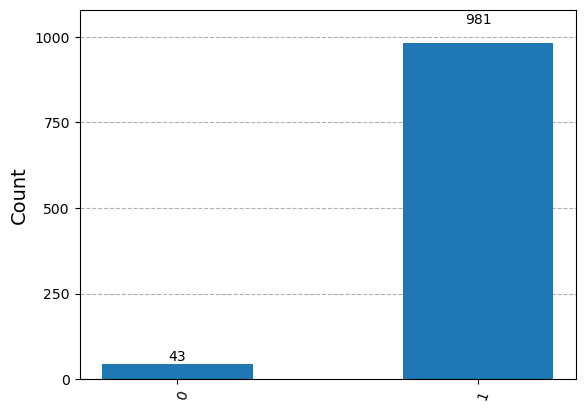

In [32]:
#Real Quantum Computer Section 3 Running the Quantum circuit

# Transpile the circuit for the chosen backend
transpiled_circuit = transpile(circuit, backend)

# Execute the circuit
job = backend.run(transpiled_circuit, shots=1024)  # Use backend.run() instead of execute
quantum_result = job.result()  # Get the result

# Get the counts
counts = quantum_result.get_counts(circuit)
print("Counts:", counts)

#plotting the histogram
plot_histogram(counts)
